# IDS-01: Aufgaben
## numpy importieren und Textdatei (CSV) laden

In [4]:
import os

In [18]:
import matplotlib.pyplot as plt

In [19]:
os.getcwd()

'/Users/reslr/Documents/MSc/IDS'

In [7]:
ls

IDS-01-Aufgabe.ipynb    Untitled.ipynb          decomp_test.txt
IDS-02-Aufgaben.ipynb   Untitled1.ipynb         myplot.py
IDS-03.ipynb            __pycache__/            smp_data.txt
IDS02 k-means .ipynb    clicks.txt
IDS02-2021-12-04.ipynb  credit.txt


numpy importieren und Textdatei (CSV) laden

In [20]:
import numpy as np

In [21]:
data = np.loadtxt("smp_data.txt", delimiter=",")

In [10]:
#print(data)

Ausgabe einzelner Zeilen und Spalten mit [min_row : max_row, min_col : max_col]

In [17]:
data

array([[  3.,  80.],
       [  1.,  35.],
       [  6., 392.],
       [  9., 515.],
       [ 11., 742.],
       [  7., 401.],
       [  5., 266.],
       [  8., 390.],
       [  2.,  69.],
       [  5., 157.],
       [  7., 339.],
       [ 10., 486.],
       [  6., 182.],
       [  4., 234.],
       [  7., 287.],
       [  8., 455.],
       [  2.,  41.],
       [ 10., 638.],
       [  5., 179.],
       [  8., 335.],
       [  9., 488.],
       [  4., 119.],
       [  4., 201.],
       [  7., 483.],
       [ 11., 615.],
       [  8., 609.],
       [  3., 268.],
       [  5., 211.],
       [  8., 313.],
       [  4., 309.],
       [  2., 121.],
       [ 11., 535.],
       [  3., 109.],
       [  7., 231.],
       [  9., 384.],
       [  6., 292.],
       [  6., 215.],
       [  9., 570.],
       [  4., 159.],
       [  8., 369.],
       [  5., 357.],
       [ 10., 517.],
       [  3., 292.],
       [ 11., 559.],
       [  6., 158.],
       [  7., 382.],
       [  4.,  91.],
       [ 10.,

matplotlib importieren und Daten plotten, pyplot plottet zweidimensionale Daten

In [14]:
import matplotlib.pyplot as plt

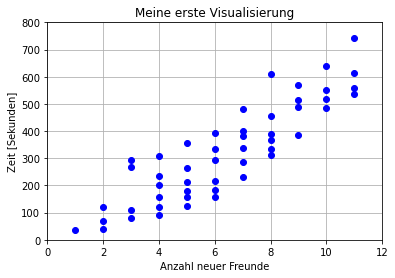

In [16]:
plt.xlabel("Anzahl neuer Freunde")
plt.ylabel("Zeit [Sekunden]")
plt.title("Meine erste Visualisierung")
plt.axis([0,12,0,800])
plt.grid(True)
plt.plot(data[:,0],data[:,1], 'bo')

## Lineare Regression
scikit-learn importieren, Modell aufsetzen und trainieren

In [10]:
from sklearn.linear_model import LinearRegression as lr
model = lr()

Daten in X-Koordinaten und Y-Koordinaten slicen 

In [11]:
x_data = data[:,0]
y_data = data[:,1]

In [12]:
print(x_data)

[ 3.  1.  6.  9. 11.  7.  5.  8.  2.  5.  7. 10.  6.  4.  7.  8.  2. 10.
  5.  8.  9.  4.  4.  7. 11.  8.  3.  5.  8.  4.  2. 11.  3.  7.  9.  6.
  6.  9.  4.  8.  5. 10.  3. 11.  6.  7.  4. 10.  5.  6.]


model.fit(x_data, y_data) 
funktioniert nicht, da x-daten falsch orientiert sind:
Problem: xdata ist Spaltenvektor -> Daten umformen (numpy.reshape)
Bedeutung von (-1, 1): unbekannte Anzahl an Zeilen bei genau einer Spalte -> Spaltenvektor

In [13]:
x_data = data[:,0].reshape((-1, 1))

In [14]:
#print(x_data)

In [15]:
model.fit(x_data, y_data)
beta0 = model.intercept_
beta1 = model.coef_
print(beta0, beta1)

-45.50063574548079 [57.88097739]


In [16]:
y_pred = model.predict(x_data)

Text(0.5, 1.0, 'Meine erste Visualisierung')

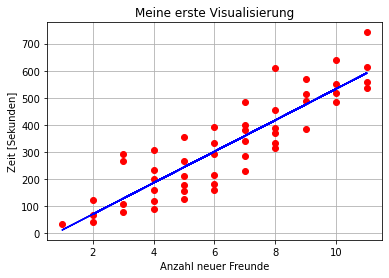

In [17]:
plt.plot(data[:,0],data[:,1], 'ro')
plt.plot(x_data, y_pred, 'b-') # b- : blaue gerade
plt.grid(True)
## von oben kopiert:
plt.xlabel("Anzahl neuer Freunde")
plt.ylabel("Zeit [Sekunden]")
plt.title("Meine erste Visualisierung")

MSE ist ein gutes Mass für die Varianz (vgl. Varianz aus der Statistik), d.h. wie stark die
vorhergesagten Werte ( ) von den tatsächlichen / beobachteten Werten ( ) variieren

In [18]:
# Mittlere quadratische abweichung MSE berechnung
from sklearn.metrics import mean_squared_error as mse
mse(y_data, y_pred, squared=False)

81.96005062057918

In [19]:
from sklearn.metrics import r2_score
r2_score(y_data, y_pred) # unsere Regressionsgerade gibt die Tendenz zu 80% wieder 

0.783015570003795

## Kreuzvalidierung

In [20]:
x_train = x_data[:-10]
x_test = x_data[-10:]
y_train = y_data[:-10]
y_test = y_data[-10:]
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [21]:
print(y_test)

[357. 517. 292. 559. 158. 382.  91. 551. 125. 333.]


In [22]:
print(mse(y_test, y_pred, squared=False))

r2_score(y_test, y_pred) # modell wird schlechter, weil wir zuwenig Daten haben 

93.84640479162644


0.6731368540714764

## Praktische Übung mit testdatensatz aus Sci-Kit-Learn

- Datensatz: Diabetes (aus dem Paket sklearn)
```
from sklearn import datasets
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_x = diabates_x[:, numpy.newaxis, 2]
```
- Aufgabe
    - Datensatz in Trainings- und Testdaten aufteilen (80% : 20%)
    - Modell trainieren
    - Modell testen und Fehler (MSE, R2) bestimmen
    - Ergebnisse plotten

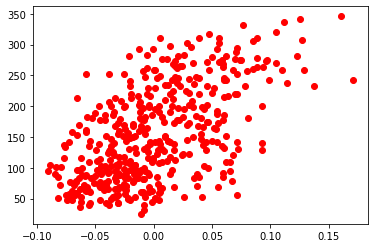

In [27]:
from sklearn import datasets
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_x = diabetes_x[:, np.newaxis, 2]
plt.plot(diabetes_x,diabetes_y, 'ro')

In [42]:
test_split=int(diabetes_y.size/100*20)  ## 20% der Daten ausgeben 
print(-test_split)

-88


MSE: 64.22472573032357
R2_score 0.36254054806070146


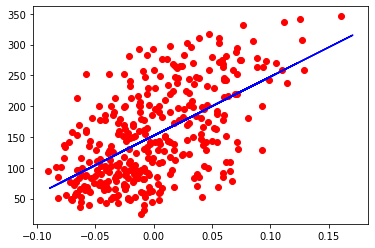

In [70]:
# Datensatz in Trainings- und Testdaten aufteilen (80% : 20%)
model = lr()
dia_x_train = diabetes_x[:-test_split]
dia_x_test = diabetes_x[-test_split:]
dia_y_train = diabetes_y[:-test_split]
dia_y_test = diabetes_y[-test_split:]
# Modell trainieren
model.fit(dia_x_train, dia_y_train)
dia_y_pred = model.predict(dia_x_test)

print("MSE:", mse(dia_y_test,dia_y_pred, squared=False))
print("R2_score", r2_score(dia_y_test,dia_y_pred))
plt.plot(dia_x_train,dia_y_train,'ro')
plt.plot(dia_x_test,dia_y_pred,'b-')